## Import all needed modules

In [2]:
import numpy as np
import random
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, Reshape, BatchNormalization
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as pyplot
import seaborn; seaborn.set()
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

## Build the model

In [13]:
model = Sequential()
model.add(Conv2D(64, (2, 2), padding='same', activation='relu', input_shape=(18, 13, 3)))
#model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), strides=(2,2), padding='same', activation='relu'))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
#model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(95, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 18, 13, 64)        832       
                                                                 
 conv2d_6 (Conv2D)           (None, 18, 13, 64)        36928     
                                                                 
 conv2d_7 (Conv2D)           (None, 9, 7, 64)          36928     
                                                                 
 conv2d_8 (Conv2D)           (None, 9, 7, 64)          36928     
                                                                 
 conv2d_9 (Conv2D)           (None, 9, 7, 64)          16448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 3, 64)         0         
 2D)                                                             
                                                      

## Training Data Loading

In [8]:
namesToClass = {
    "lowera": 0,
    "lowerb": 1,
    "lowerc": 2,
    "lowerd": 3,
    "lowere": 4,
    "lowerf": 5,
    "lowerg": 6,
    "lowerh": 7,
    "loweri": 8,
    "lowerj": 9,
    "lowerk": 10,
    "lowerl": 11,
    "lowerm": 12,
    "lowern": 13,
    "lowero": 14,
    "lowerp": 15,
    "lowerq": 16,
    "lowerr": 17,
    "lowers": 18,
    "lowert": 19,
    "loweru": 20,
    "lowerv": 21,
    "lowerw": 22,
    "lowerx": 23,
    "lowery": 24,
    "lowerz": 25,
    "upperA": 26,
    "upperB": 27,
    "upperC": 28,
    "upperD": 29,
    "upperE": 30,
    "upperF": 31,
    "upperG": 32,
    "upperH": 33,
    "upperI": 34,
    "upperJ": 35,
    "upperK": 36,
    "upperL": 37,
    "upperM": 38,
    "upperN": 39,
    "upperO": 40,
    "upperP": 41,
    "upperQ": 42,
    "upperR": 43,
    "upperS": 44,
    "upperT": 45,
    "upperU": 46,
    "upperV": 47,
    "upperW": 48,
    "upperX": 49,
    "upperY": 50,
    "upperZ": 51,
    "num1": 52,
    "num2": 53,
    "num3" : 54,
    "num4" : 55,
    "num5": 56,
    "num6": 57,
    "num7": 58,
    "num8": 59,
    "num9": 60,
    "num0": 61,
    "exclamation": 62,
    "at": 63,
    "pound": 64,
    "dollar": 65,
    "percent": 66,
    "caret": 67,
    "and": 68,
    "asterisk": 69,
    "openPar": 70,
    "closePar": 71,
    "hyphen": 72,
    "underscore": 73,
    "plus": 74,
    "equals": 75,
    "openBrace": 76,
    "closeBrace": 77,
    "openSquare": 78,
    "closeSquare": 79,
    "pipe": 80,
    "backslash": 81,
    "colon": 82,
    "semicolon": 83,
    "quote": 84,
    "apostrophe": 85,
    "openTriangle": 86,
    "closeTriangle": 87,
    "comma": 88,
    "period": 89,
    "forwardSlash": 90,
    "question": 91,
    "tilde": 92,
    "grave": 93,
    "space": 94
}

def loadTrainingData(data_path):
    X = []
    Y = []
    
    for root, dirs, files in os.walk(data_path, topdown=False):
        for f in files:
            key = f.split("_")[0]
            if key in namesToClass:
                img = load_img(os.path.join(root, f))
                arr = img_to_array(img, dtype='float32')
                arr = arr / 255

                X.append(arr)
                Y.append(namesToClass[key])
    
    return X, Y

## Training Data Splitting

In [7]:
def splitTrainingValidation(X, Y, split_size=0.2):
    if len(X) == len(Y):
        splitCount = int(len(X) * split_size)
        
        used_indices = []
        
        X_set = []
        X_val = []
        Y_set = []
        Y_val = []
        
        while len(X_val) < splitCount:
            index = random.randint(0, len(X)-1)
            if index not in used_indices:
                X_val.append(X[index])
                Y_val.append(Y[index])
                used_indices.append(index)
        
        for i in range(0, len(X)-1):
            if i not in used_indices:
                X_set.append(X[i])
                Y_set.append(Y[i])
                
        return np.array(X_set), np.array(Y_set), np.array(X_val), np.array(Y_val)

## Loading Training Data and Training

In [9]:
X, Y = loadTrainingData("../Traing Data Preprocessing/Training Data/Processed")
X, Y, X_val, Y_val = splitTrainingValidation(X, Y, split_size=0.2)

print(X.shape)
print(Y.shape)
print (X_val.shape)
print (Y_val.shape)

(82019, 18, 13, 3)
(82019,)
(20505, 18, 13, 3)
(20505,)


Epoch 1/20
2564/2564 [==============================] - 73s 28ms/step - loss: 2.3860 - accuracy: 0.3635 - val_loss: 0.6679 - val_accuracy: 0.7968
Epoch 2/20
2564/2564 [==============================] - 72s 28ms/step - loss: 0.5238 - accuracy: 0.8300 - val_loss: 0.2381 - val_accuracy: 0.9246
Epoch 3/20
2564/2564 [==============================] - 72s 28ms/step - loss: 0.2635 - accuracy: 0.9116 - val_loss: 0.0974 - val_accuracy: 0.9679
Epoch 4/20
2564/2564 [==============================] - 74s 29ms/step - loss: 0.1731 - accuracy: 0.9420 - val_loss: 0.0582 - val_accuracy: 0.9826
Epoch 5/20
2564/2564 [==============================] - 72s 28ms/step - loss: 0.1330 - accuracy: 0.9548 - val_loss: 0.0953 - val_accuracy: 0.9687
Epoch 6/20
2564/2564 [==============================] - 72s 28ms/step - loss: 0.1128 - accuracy: 0.9620 - val_loss: 0.0474 - val_accuracy: 0.9846
Epoch 7/20
2564/2564 [==============================] - 72s 28ms/step - loss: 0.0957 - accuracy: 0.9675 - val_loss: 0.0367 -

(91.0, 0.0)

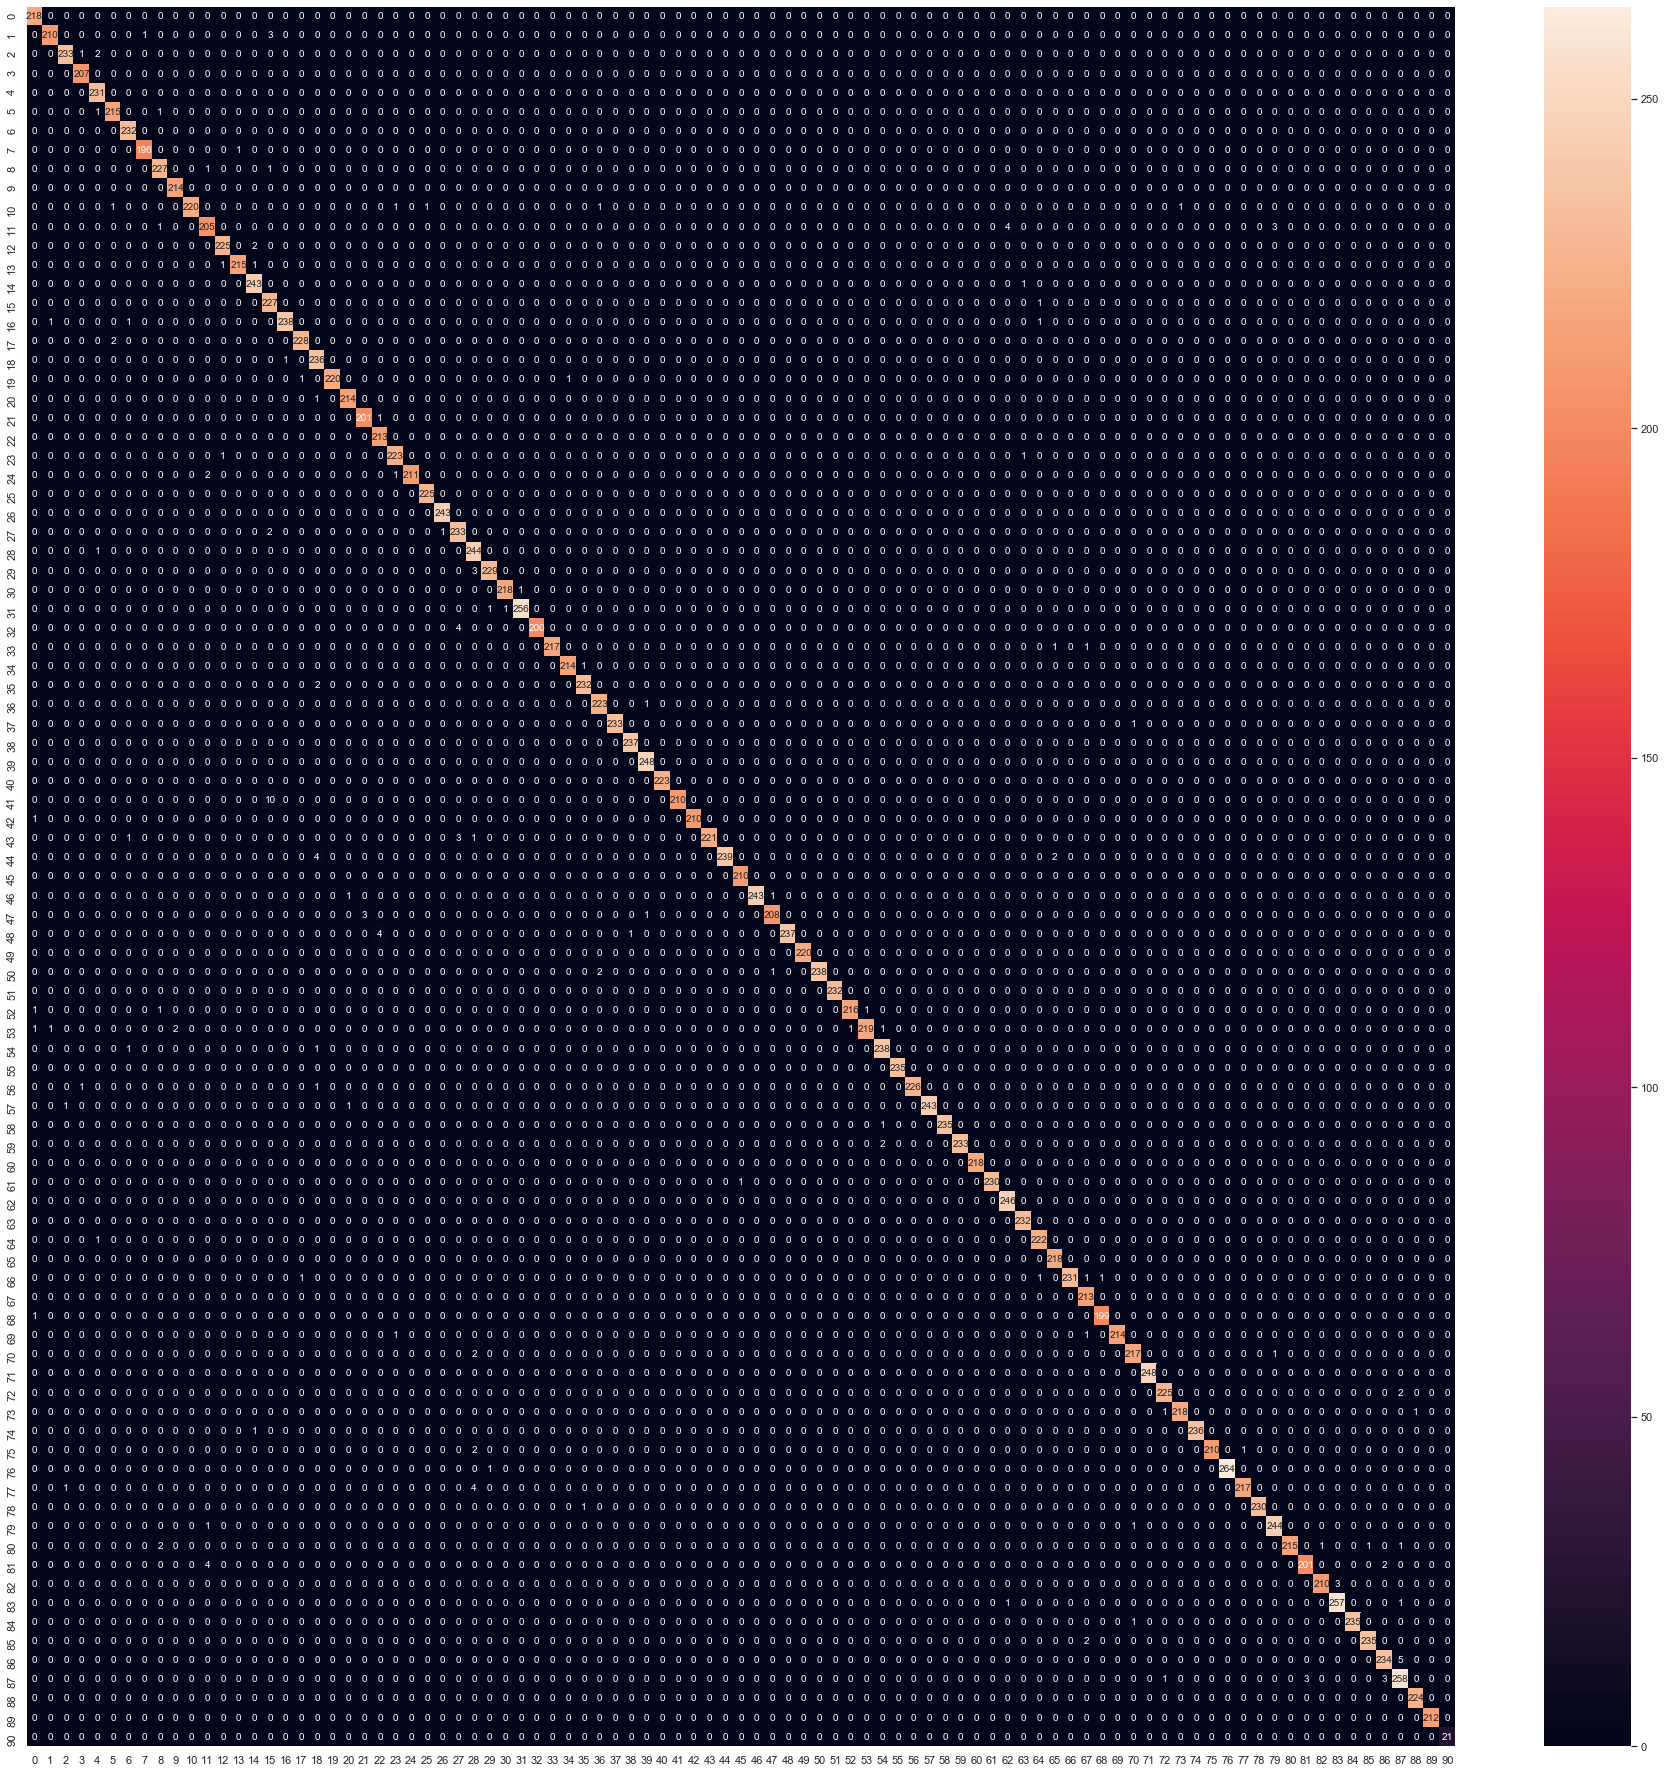

In [14]:
es = EarlyStopping(monitor='loss', patience=3, min_delta=0.01)
#reduce = ReduceLROnPlateau(monitor='loss', patience=3, factor=0.7)

model.fit(X, Y, epochs=20, validation_data=(X_val, Y_val), callbacks=[es])

y_predicted = model.predict(X_val)
y_predicted = np.argmax(y_predicted, axis=1)

#Get metrics
print(Y_val)
print(y_predicted)
print(metrics.classification_report(Y_val, y_predicted))

#Draw confusion matrix
matrix = metrics.confusion_matrix(Y_val, y_predicted)
pyplot.figure(figsize=(32,32))
hm = seaborn.heatmap(matrix, annot=True, fmt='d')
bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)

## Saving the UnQuantized model

In [15]:
model.save("./models/CharacterRecognition")

INFO:tensorflow:Assets written to: ./models/CharacterRecognition\assets


INFO:tensorflow:Assets written to: ./models/CharacterRecognition\assets


## Quantization

In [16]:
model = tf.keras.models.load_model("./models/CharacterRecognition")

converter = tf.lite.TFLiteConverter.from_keras_model(model)

converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.allow_custom_ops = True


def respresentative_dataset_gen():
    img = tf.data.Dataset.from_tensor_slices(X).batch(1)
    for i in img.take(30):
        yield [i]
        
converter.representative_dataset = respresentative_dataset_gen

converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8  # or tf.uint8
converter.inference_output_type = tf.int8  # or tf.uint8

tflite_model = converter.convert()

with open('./models/Character_Recognition_Model.tflite','wb') as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\teega\AppData\Local\Temp\tmpj4sn4llw\assets


INFO:tensorflow:Assets written to: C:\Users\teega\AppData\Local\Temp\tmpj4sn4llw\assets
C:\Users\teega\Anaconda3\lib\site-packages\tensorflow\lite\python\convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


## Manually checking quantized model accuracy

In [9]:
interpreter = tf.lite.Interpreter(model_path='./models/CharacterRecognition.tflite')
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

input_shape = input_details[0]['shape']

matches = 0
for i in range(0, 200):
    input_data = np.array([X_val[i]], dtype=np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)

    interpreter.invoke()

    output_data = interpreter.get_tensor(output_details[0]['index'])
    
    expected = Y_val[i]
    got = np.argmax(output_data)
    match = expected == got
    print("expected: " + str(expected) + " | got: " + str(got) + " | match?: " + str(match))
    if match:
        matches += 1

print ("Accuracy: " + str(matches / 200))

expected: 29 | got: 29 | match?: True
expected: 65 | got: 65 | match?: True
expected: 34 | got: 34 | match?: True
expected: 76 | got: 76 | match?: True
expected: 74 | got: 74 | match?: True
expected: 36 | got: 36 | match?: True
expected: 19 | got: 19 | match?: True
expected: 39 | got: 39 | match?: True
expected: 17 | got: 17 | match?: True
expected: 10 | got: 10 | match?: True
expected: 80 | got: 80 | match?: True
expected: 60 | got: 60 | match?: True
expected: 87 | got: 87 | match?: True
expected: 79 | got: 79 | match?: True
expected: 47 | got: 47 | match?: True
expected: 53 | got: 53 | match?: True
expected: 78 | got: 78 | match?: True
expected: 36 | got: 36 | match?: True
expected: 22 | got: 22 | match?: True
expected: 16 | got: 16 | match?: True
expected: 84 | got: 84 | match?: True
expected: 27 | got: 27 | match?: True
expected: 20 | got: 20 | match?: True
expected: 88 | got: 88 | match?: True
expected: 26 | got: 26 | match?: True
expected: 46 | got: 46 | match?: True
expected: 2 